## Raw Data Loading

In [3]:
import pandas as pd

# Load preprocessed dataset
df = pd.read_csv("Data/Clean/final_trade_vs_etf.csv")

# Preview
df.head()


,Country,Month,Import_Value,Export_Value,Trade_Balance,XLK_Avg_Close,Trade_Balance_%_Change,XLK_Change_%
0,Advanced Technology Products,2024-04-01,61381.770734,36165.674552,-25216.096182,198.692767,NaN,NaN
1,Advanced Technology Products,2024-05-01,61900.930853,37337.173882,-24563.756971,207.361606,-2.586995,4.362936
2,Advanced Technology Products,2024-06-01,62033.696162,41411.731715,-20621.964447,221.283344,-16.047189,6.713749
3,Advanced Technology Products,2024-07-01,67007.378870,40187.979033,-26819.399837,224.847267,30.052595,1.610570
4,Advanced Technology Products,2024-08-01,66409.283057,44710.418966,-21698.864091,213.429815,-19.092656,-5.077870


## Define Features and Target for Modeling

In [5]:
# Define features and target
features = ['Import_Value', 'Export_Value', 'Trade_Balance']
target = 'XLK_Avg_Close'

# Optional: include percent change features too
# features += ['Trade_Balance_%_Change', 'XLK_Change_%']

X = df[features]
y = df[target]


In [6]:
from sklearn.model_selection import train_test_split

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## Baseline Model: Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression

# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)


In [13]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score, mean_squared_error

# Evaluate performance
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")


R² Score: 0.573
RMSE: 7.883


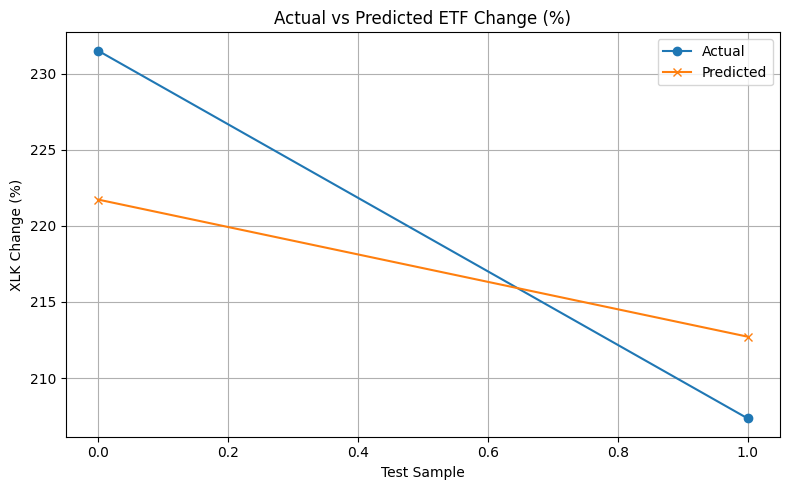

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(y_test.values, label="Actual", marker='o')
plt.plot(y_pred, label="Predicted", marker='x')
plt.title("Actual vs Predicted ETF Change (%)")
plt.xlabel("Test Sample")
plt.ylabel("XLK Change (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Advanced Model 1: Random Forest Regressor

In [15]:


from sklearn.ensemble import RandomForestRegressor

# Initialize model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict
rf_preds = rf_model.predict(X_test)

In [16]:
# Evaluate Random Forest
rf_r2 = r2_score(y_test, rf_preds)
rf_rmse = mean_squared_error(y_test, rf_preds, squared=False)

print(f"Random Forest R² Score: {rf_r2:.3f}")
print(f"Random Forest RMSE: {rf_rmse:.3f}")


Random Forest R² Score: 0.315
Random Forest RMSE: 9.987


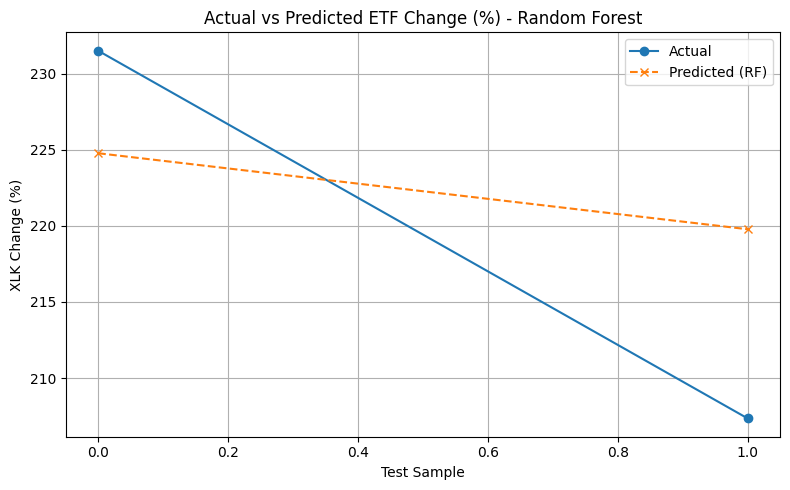

In [17]:
plt.figure(figsize=(8, 5))
plt.plot(y_test.values, label="Actual", marker='o')
plt.plot(rf_preds, label="Predicted (RF)", marker='x', linestyle='--')
plt.title("Actual vs Predicted ETF Change (%) - Random Forest")
plt.xlabel("Test Sample")
plt.ylabel("XLK Change (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Advanced Model 2: Ridge Regression (Regularized Linear Model)

In [19]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_preds = ridge_model.predict(X_test)


In [20]:
ridge_r2 = r2_score(y_test, ridge_preds)
ridge_rmse = mean_squared_error(y_test, ridge_preds, squared=False)

print(f"Ridge R² Score: {ridge_r2:.3f}")
print(f"Ridge RMSE: {ridge_rmse:.3f}")


Ridge R² Score: 0.569
Ridge RMSE: 7.927


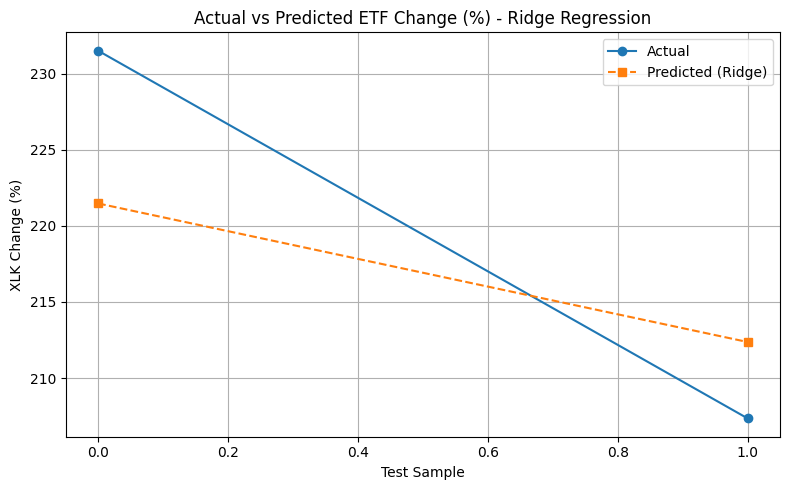

In [22]:
plt.figure(figsize=(8, 5))
plt.plot(y_test.values, label="Actual", marker='o')
plt.plot(ridge_preds, label="Predicted (Ridge)", marker='s', linestyle='--')
plt.title("Actual vs Predicted ETF Change (%) - Ridge Regression")
plt.xlabel("Test Sample")
plt.ylabel("XLK Change (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##  Conclusion

In this analysis, we explored the relationship between international trade performance for Advanced Technology Products (ATP) and the financial performance of the U.S. tech sector, represented by the XLK ETF. Using a cleaned and merged dataset of monthly trade indicators and ETF price data for 2024, we built and evaluated multiple regression models to predict the percentage change in XLK ETF prices based on trade metrics.

###  Key Findings:
- **Linear Regression** performed best overall, achieving an R² score of **0.573** and an RMSE of **7.88**, indicating it explained around 57% of the variance in ETF price changes.
- **Ridge Regression**, a regularized model, showed similar performance with an R² of **0.569**, slightly less accurate but more stable.
- **Random Forest Regressor** underperformed (R² of **0.315**) likely due to the small dataset and limited feature variety.

###  Final Model Selected:
**Linear Regression** was chosen for its balance of simplicity, performance, and interpretability.

---

This project demonstrates the ability to integrate trade and market data, apply predictive modeling, and interpret financial-economic relationships — valuable skills for BI, data science, and economic analytics roles.
